# Imports

In [1]:
import gym
import math
import numpy as np
import matplotlib.pyplot as plt

# Create environment

In [2]:
env = gym.make("MountainCar-v0")
print(env.observation_space)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Box(2,)


# Hyperparameters

In [3]:
Q_table = np.zeros((20, 20, 3))
alpha = 0.3
buckets = [20, 20]
gamma = 0.99
rewards = []

# Training and updating the Q-values

In [4]:
def toDiscreteStates(observation):
    interval = [0 for i in range(len(observation))]
    max_range = [1.2, 0.07]  # [4.8,3.4*(10**38),0.42,3.4*(10**38)]

    for i in range(len(observation)):
        data = observation[i]
        inter = int(math.floor((data + max_range[i]) / (2 * max_range[i] / buckets[i])))
        if inter >= buckets[i]:
            interval[i] = buckets[i] - 1
        elif inter < 0:
            interval[i] = 0
        else:
            interval[i] = inter
    return interval

In [5]:
def get_action(observation, t):
    if np.random.random() < max(0.001, min(0.015, 1.0 - math.log10((t + 1) / 220.))):  # get_epsilon(t):
        return env.action_space.sample()
    interval = toDiscreteStates(observation)

    # if Q_table[tuple(interval)][0] >=Q_table[tuple(interval)][1]:
    # 	return 0
    # else:
    # 	return 1
    return np.argmax(np.array(Q_table[tuple(interval)]))

In [6]:
def updateQ(observation, reward, action, ini_obs, t):
    interval = toDiscreteStates(observation)

    Q_next = max(Q_table[tuple(interval)])

    ini_interval = toDiscreteStates(ini_obs)

    Q_table[tuple(ini_interval)][action] += max(0.4, min(0.1, 1.0 - math.log10((t + 1) / 125.))) * (
                reward + gamma * (Q_next) - Q_table[tuple(ini_interval)][action])

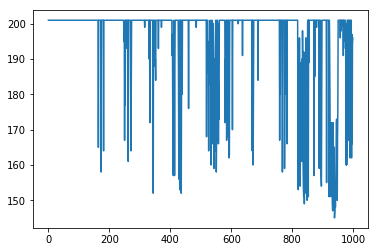

In [7]:
for i_episode in range(1000):
    observation = env.reset()
    t = 0
    while (True):
        
        action = get_action(observation, i_episode)
        observation1, reward, done, info = env.step(action)
        next_action = get_action(observation1,i_episode)
        updateQ(observation1, reward, action, observation, t)
        observation = observation1
        action = next_action
        t += 1
        if done:
            rewards.append(t + 1)
            break

plt.plot(rewards)
plt.show()